In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the data
train = pd.read_csv('train.csv')  

print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [2]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
print(train.shape)

(1460, 81)


In [4]:

print(train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [9]:
#  Convert categoricals to 'category' dtype for efficiency
categorical_cols = train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    train[col] = train[col].astype('category')
print(train_encoded.head())

         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.730865    0.073375    -0.208034 -0.207142     0.651479    -0.517200   
1 -1.728492   -0.872563     0.409895 -0.091886    -0.071836     2.179628   
2 -1.726120    0.073375    -0.084449  0.073480     0.651479    -0.517200   
3 -1.723747    0.309859    -0.414011 -0.096897     0.651479    -0.517200   
4 -1.721374    0.073375     0.574676  0.375148     1.374795    -0.517200   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
0   1.050994      0.878668    0.510015    0.575425  ...           False   
1   0.156734     -0.429577   -0.572835    1.171992  ...           False   
2   0.984752      0.830215    0.322174    0.092907  ...           False   
3  -1.863632     -0.720298   -0.572835   -0.499274  ...           False   
4   0.951632      0.733308    1.360826    0.463568  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         Fals

In [5]:
#  Handle missing values
print(train.isnull().sum())


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [8]:
#  Handle outliers 
import numpy as np
if 'SalePrice' in train.columns:
    train['SalePrice_log'] = np.log1p(train['SalePrice'])
print(train_encoded.head())

         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.730865    0.073375    -0.208034 -0.207142     0.651479    -0.517200   
1 -1.728492   -0.872563     0.409895 -0.091886    -0.071836     2.179628   
2 -1.726120    0.073375    -0.084449  0.073480     0.651479    -0.517200   
3 -1.723747    0.309859    -0.414011 -0.096897     0.651479    -0.517200   
4 -1.721374    0.073375     0.574676  0.375148     1.374795    -0.517200   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
0   1.050994      0.878668    0.510015    0.575425  ...           False   
1   0.156734     -0.429577   -0.572835    1.171992  ...           False   
2   0.984752      0.830215    0.322174    0.092907  ...           False   
3  -1.863632     -0.720298   -0.572835   -0.499274  ...           False   
4   0.951632      0.733308    1.360826    0.463568  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         Fals

In [6]:
#  Encode categorical variables
train_encoded = pd.get_dummies(train, drop_first=True)
print(train_encoded.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...           False           False   
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False           False   
3          1970         0.0         216  ...           False           False   
4          2000       350.0         655  ...           False           False   

   SaleType_New  SaleType_Oth  SaleTyp

In [7]:
#  Feature scaling
scaler = StandardScaler()
num_cols = train_encoded.select_dtypes(include=['float64', 'int64']).columns
train_encoded[num_cols] = scaler.fit_transform(train_encoded[num_cols])
print(train_encoded.head())

         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.730865    0.073375    -0.208034 -0.207142     0.651479    -0.517200   
1 -1.728492   -0.872563     0.409895 -0.091886    -0.071836     2.179628   
2 -1.726120    0.073375    -0.084449  0.073480     0.651479    -0.517200   
3 -1.723747    0.309859    -0.414011 -0.096897     0.651479    -0.517200   
4 -1.721374    0.073375     0.574676  0.375148     1.374795    -0.517200   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
0   1.050994      0.878668    0.510015    0.575425  ...           False   
1   0.156734     -0.429577   -0.572835    1.171992  ...           False   
2   0.984752      0.830215    0.322174    0.092907  ...           False   
3  -1.863632     -0.720298   -0.572835   -0.499274  ...           False   
4   0.951632      0.733308    1.360826    0.463568  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         Fals

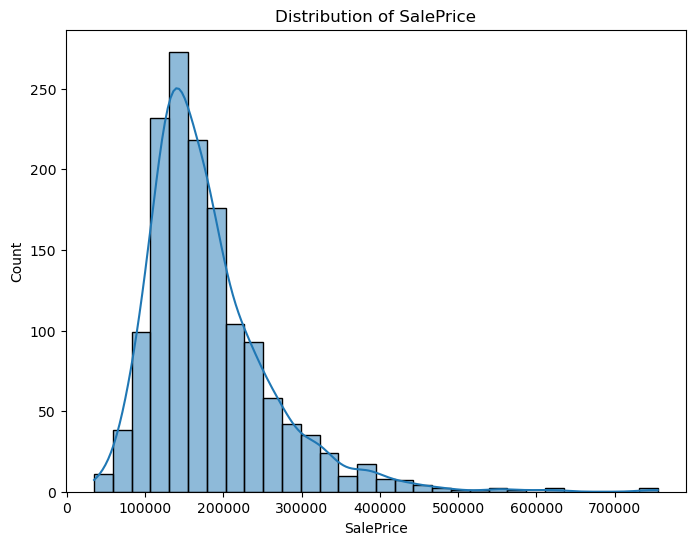

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Variable analysis, distribution of SalePrice
plt.figure(figsize=(8,6))
sns.histplot(train['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.show()

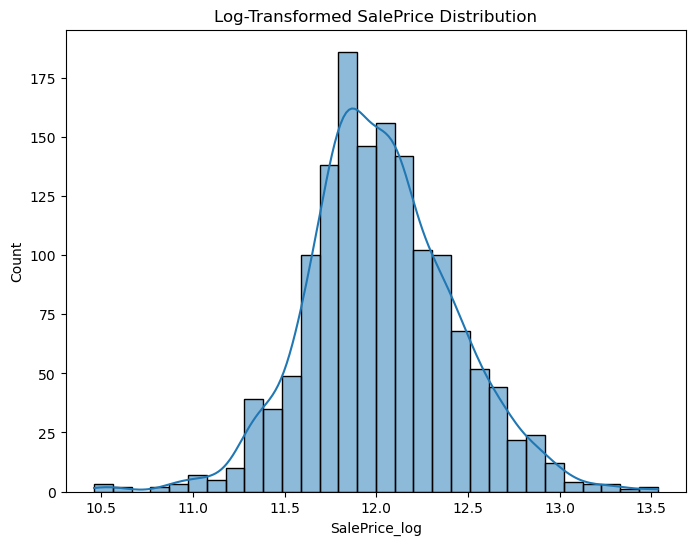

In [11]:
# Log transform SalePrice if skewed
train['SalePrice_log'] = np.log1p(train['SalePrice'])

plt.figure(figsize=(8,6))
sns.histplot(train['SalePrice_log'], kde=True, bins=30)
plt.title('Log-Transformed SalePrice Distribution')
plt.show()


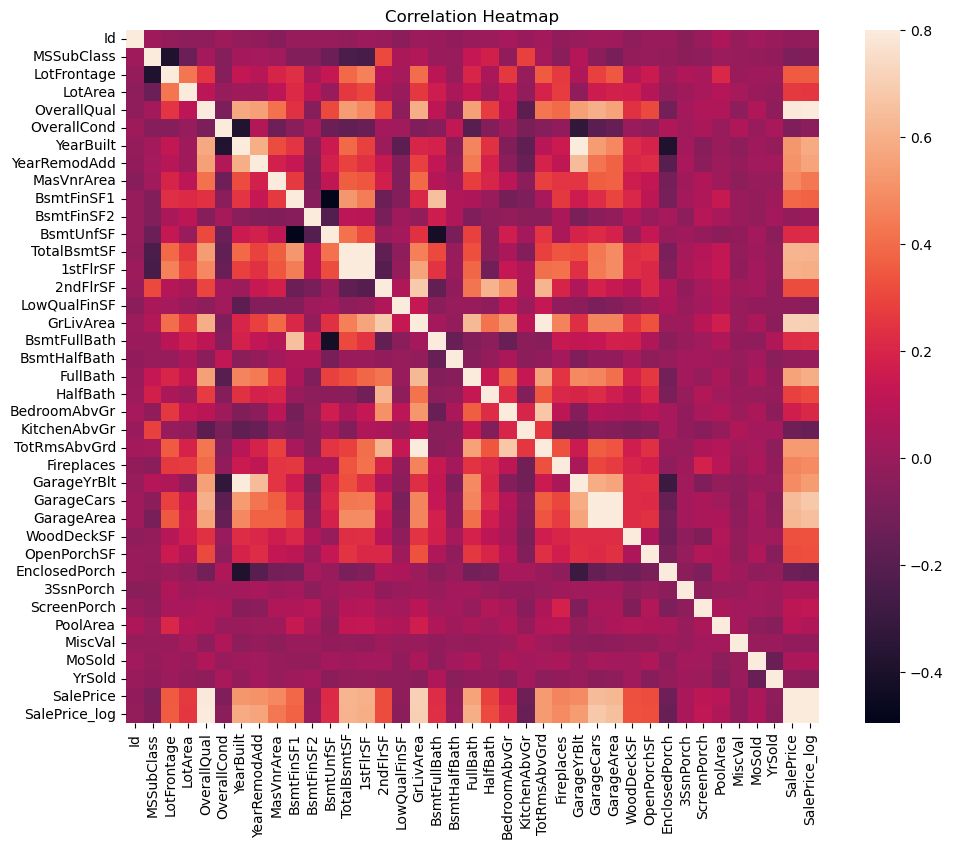

In [12]:
# Correlation matrix to find important predictors
numeric_train = train.select_dtypes(include=['int64', 'float64'])

corrmat = numeric_train.corr()

plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.title('Correlation Heatmap')
plt.show()


In [13]:
# Top correlated features with SalePrice
print(corrmat['SalePrice'].sort_values(ascending=False).head(10))


SalePrice        1.000000
SalePrice_log    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
Name: SalePrice, dtype: float64


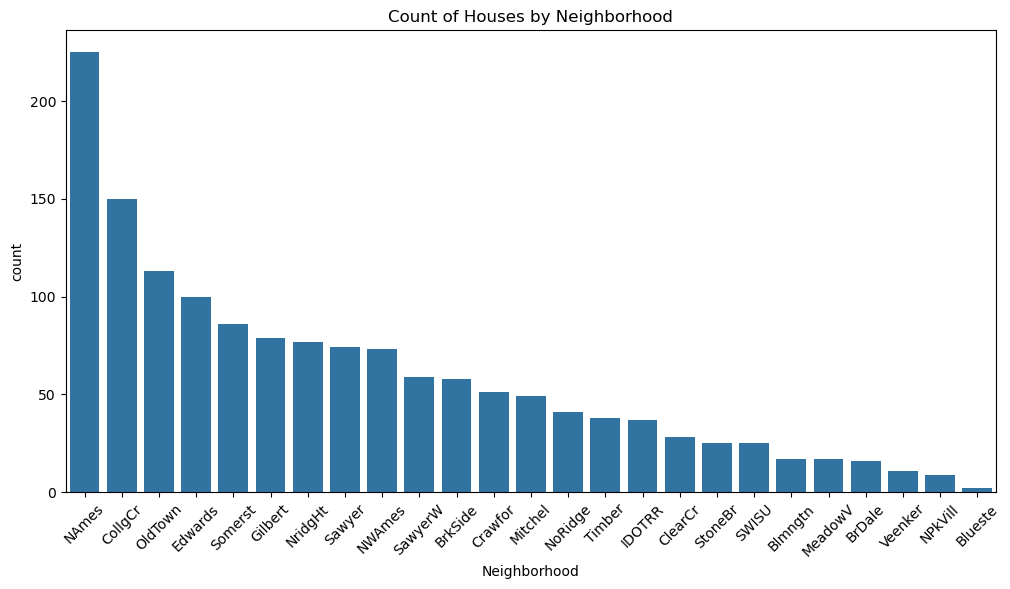

In [14]:
# Visualize categorical variables counts and SalePrice by category
plt.figure(figsize=(12,6))
sns.countplot(x='Neighborhood', data=train, order=train['Neighborhood'].value_counts().index)
plt.title('Count of Houses by Neighborhood')
plt.xticks(rotation=45)
plt.show()

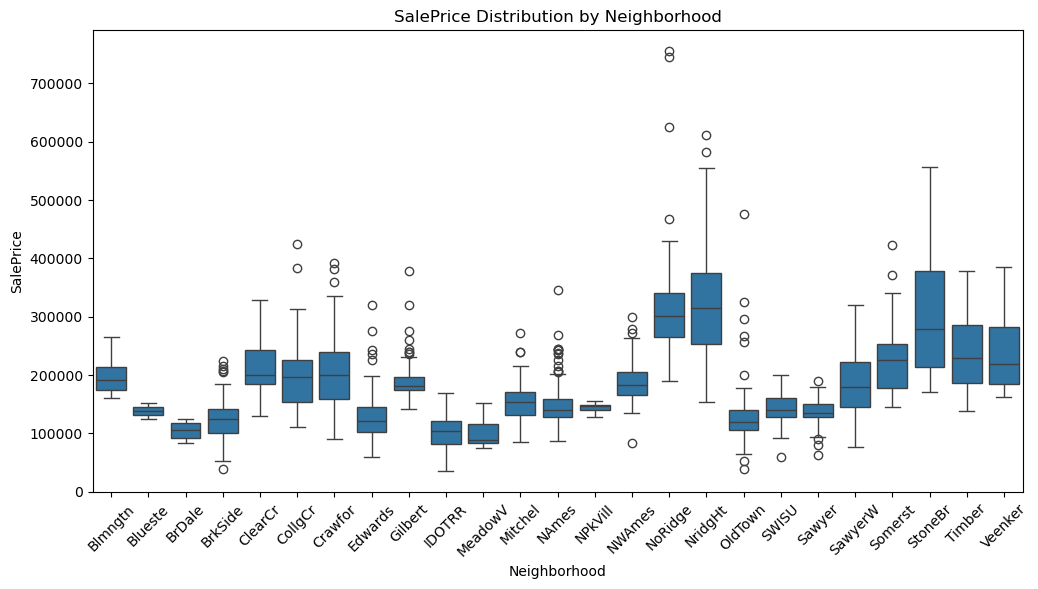

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
plt.title('SalePrice Distribution by Neighborhood')
plt.xticks(rotation=45)
plt.show()

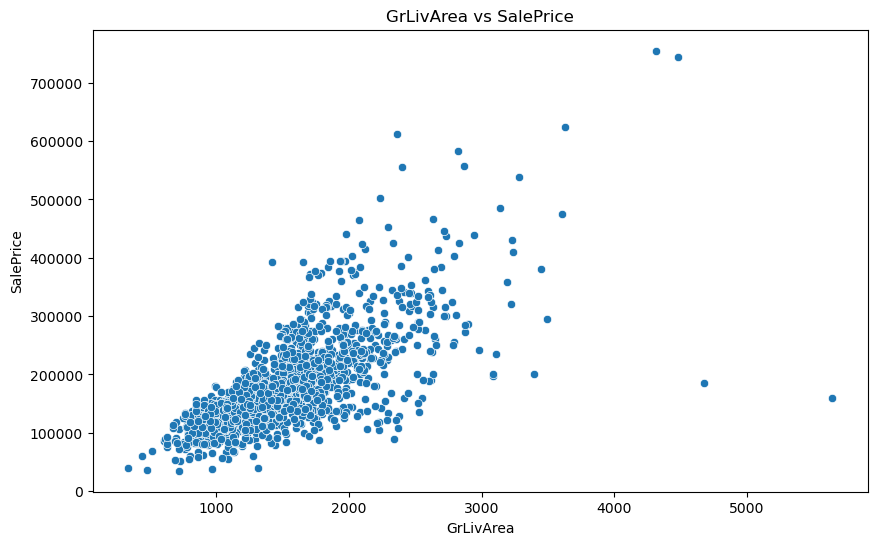

In [16]:
# Scatter plot for numerical features vs. SalePrice
plt.figure(figsize=(10,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.title('GrLivArea vs SalePrice')
plt.show()

In [17]:
# Create new variables
# Total square footage
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
print(train['TotalSF'].head())

0    2566
1    2524
2    2706
3    2473
4    3343
Name: TotalSF, dtype: int64


In [18]:
# Age of house at sale
train['HouseAge'] = train['YrSold'] - train['YearBuilt']
print(train['HouseAge'].head())

0     5
1    31
2     7
3    91
4     8
Name: HouseAge, dtype: int64


In [19]:
# Remodeled age
train['RemodAge'] = train['YrSold'] - train['YearRemodAdd']
print(train['RemodAge'].head())

0     5
1    31
2     6
3    36
4     8
Name: RemodAge, dtype: int64


In [20]:
# Total bathrooms (full + half baths weighted as 0.5)
train['TotalBathrooms'] = (train['FullBath'] + (0.5 * train['HalfBath']) +
                           train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))

print(train['TotalBathrooms'].head())

0    3.5
1    2.5
2    3.5
3    2.0
4    3.5
Name: TotalBathrooms, dtype: float64


In [21]:
# Interaction features example: Overall quality * Total SF
train['Quality_TotalSF'] = train['OverallQual'] * train['TotalSF']
print(train['Quality_TotalSF'].head())

0    17962
1    15144
2    18942
3    17311
4    26744
Name: Quality_TotalSF, dtype: int64


In [22]:
# Label encoding for ordinal categorical features
from sklearn.preprocessing import LabelEncoder

# ExterQual
qual_mapping = {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
train['ExterQualEncoded'] = train['ExterQual'].map(qual_mapping)

print(train['ExterQualEncoded'].head())


0    4
1    3
2    4
3    3
4    4
Name: ExterQualEncoded, dtype: category
Categories (4, int64): [5, 2, 4, 3]


In [23]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['HouseAge'] = train['YrSold'] - train['YearBuilt']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
# Split features and target variable
X = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']


In [54]:
# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Function to train and evaluate model
def evaluate_model(model):
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    r2 = r2_score(y_val, preds)
    print(f"{model._class.name_} RMSE: {rmse:.4f}")
    print(f"{model._class.name_} R2 Score: {r2:.4f}")
    return model


In [57]:
print(X.isnull().sum().sum())
print(y.isnull().sum())

7829
0


In [58]:
print(X.dtypes)

Id                      int64
MSSubClass              int64
MSZoning             category
LotFrontage           float64
LotArea                 int64
                       ...   
HouseStyle_2.5Fin        bool
HouseStyle_2.5Unf        bool
HouseStyle_2Story        bool
HouseStyle_SFoyer        bool
HouseStyle_SLvl          bool
Length: 116, dtype: object


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split features and target variable
X = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Use most frequent value for categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate model
def evaluate_model(model, preprocessor):
    # Create a pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    preds = pipeline.predict(X_val)
    
    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    r2 = r2_score(y_val, preds)
    
    print(f"{type(model).__name__} RMSE: {rmse:.4f}")
    print(f"{type(model).__name__} R2 Score: {r2:.4f}")
    
    return pipeline

#  Linear Regression
lr = LinearRegression()
evaluate_model(lr, preprocessor)

#  Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
evaluate_model(dt, preprocessor)

#  Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf, preprocessor)

#  XGBoost Regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
evaluate_model(xgbr, preprocessor)

LinearRegression RMSE: 21349.2634
LinearRegression R2 Score: 0.9406
DecisionTreeRegressor RMSE: 7883.3700
DecisionTreeRegressor R2 Score: 0.9919
RandomForestRegressor RMSE: 8491.2800
RandomForestRegressor R2 Score: 0.9906
XGBRegressor RMSE: 12253.3287
XGBRegressor R2 Score: 0.9804


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])